In [1]:
import pandas as pd

In [2]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
import sklearn

In [6]:
from sklearn.cluster import KMeans

In [7]:
from sklearn.preprocessing import scale

In [8]:
import seaborn as sns

<h1>Data Cleaning and Preprocessing</h1>

In [10]:
pokemon = pd.read_csv("pokemon.csv")

In [11]:
pokemon.shape

(801, 41)

In [12]:
pokemon.dtypes

abilities             object
against_bug          float64
against_dark         float64
against_dragon       float64
against_electric     float64
against_fairy        float64
against_fight        float64
against_fire         float64
against_flying       float64
against_ghost        float64
against_grass        float64
against_ground       float64
against_ice          float64
against_normal       float64
against_poison       float64
against_psychic      float64
against_rock         float64
against_steel        float64
against_water        float64
attack                 int64
base_egg_steps         int64
base_happiness         int64
base_total             int64
capture_rate          object
classfication         object
defense                int64
experience_growth      int64
height_m             float64
hp                     int64
japanese_name         object
name                  object
percentage_male      float64
pokedex_number         int64
sp_attack              int64
sp_defense    

In [14]:
#Tells us the number of empty values in each column of our data set.
pokemon.isnull().sum()

abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
height_m              20
hp                     0
japanese_name          0
name                   0
percentage_male       98
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                384
weight_kg             20
generation             0


In [15]:
#Using value counts on a col to count dufferent values
pokemon["is_legendary"].value_counts()

0    731
1     70
Name: is_legendary, dtype: int64

In [17]:
#Returns the column names of our data set
pokemon.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

In [18]:
#Count the unique values in our data set.
for column in pokemon:
    unique_vals = np.unique(pokemon[column])
    nr_values = len(unique_vals)
    if nr_values < 10:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature abilities :482
The number of values for feature against_bug :5 -- [0.25 0.5  1.   2.   4.  ]
The number of values for feature against_dark :5 -- [0.25 0.5  1.   2.   4.  ]
The number of values for feature against_dragon :4 -- [0.  0.5 1.  2. ]
The number of values for feature against_electric :6 -- [0.   0.25 0.5  1.   2.   4.  ]
The number of values for feature against_fairy :5 -- [0.25 0.5  1.   2.   4.  ]
The number of values for feature against_fight :6 -- [0.   0.25 0.5  1.   2.   4.  ]
The number of values for feature against_fire :5 -- [0.25 0.5  1.   2.   4.  ]
The number of values for feature against_flying :5 -- [0.25 0.5  1.   2.   4.  ]
The number of values for feature against_ghost :5 -- [0.  0.5 1.  2.  4. ]
The number of values for feature against_grass :5 -- [0.25 0.5  1.   2.   4.  ]
The number of values for feature against_ground :6 -- [0.   0.25 0.5  1.   2.   4.  ]
The number of values for feature against_ice :5 -- [0.25 0.5  1.   2.

TypeError: '<' not supported between instances of 'float' and 'str'

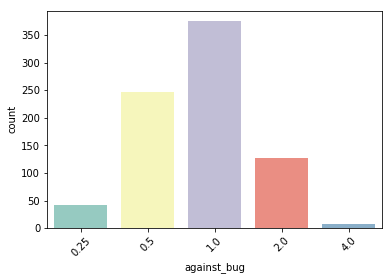

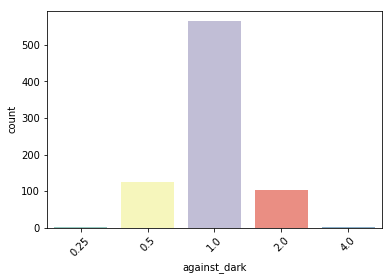

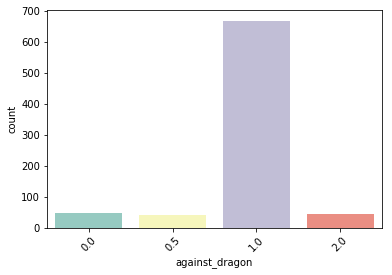

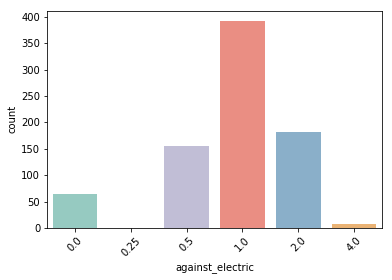

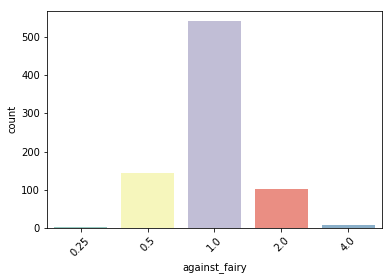

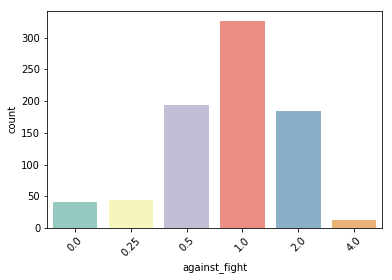

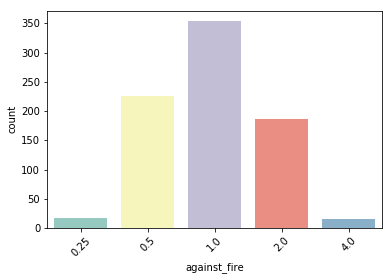

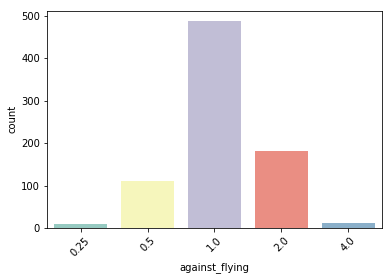

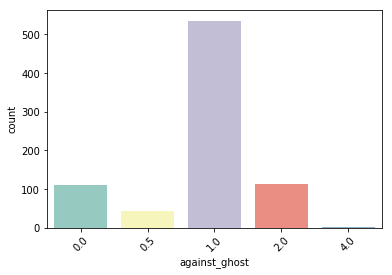

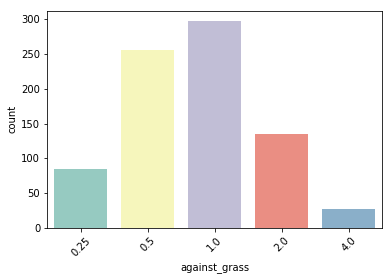

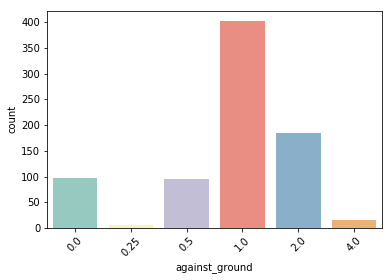

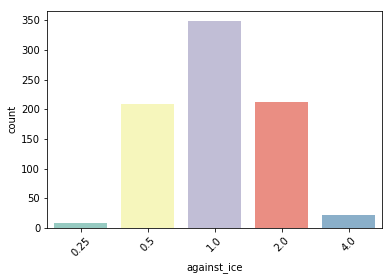

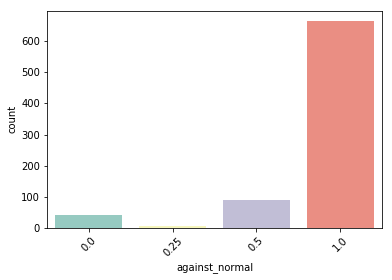

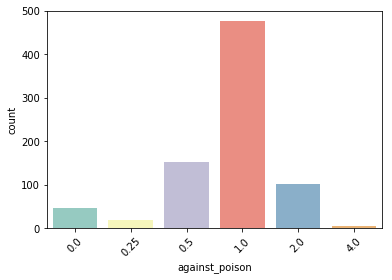

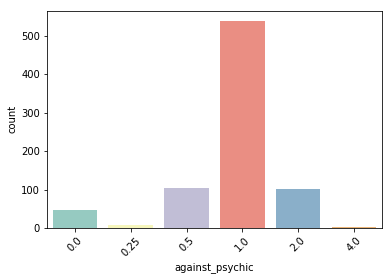

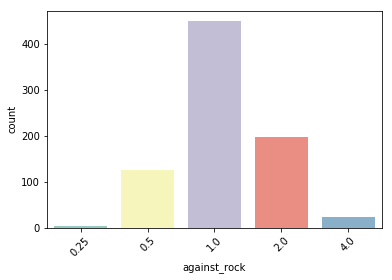

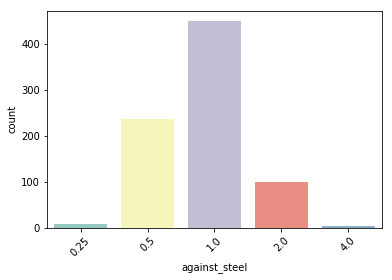

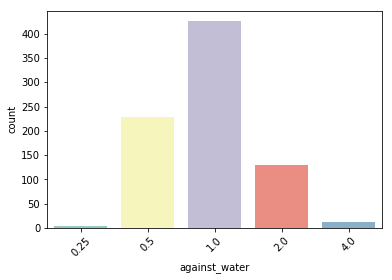

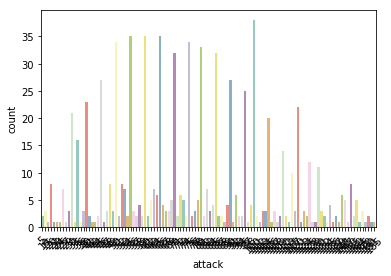

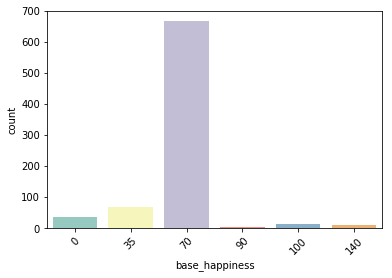

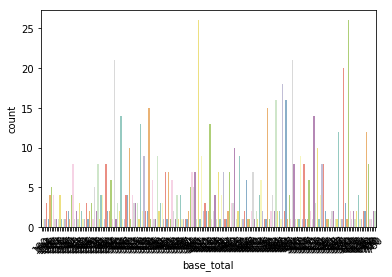

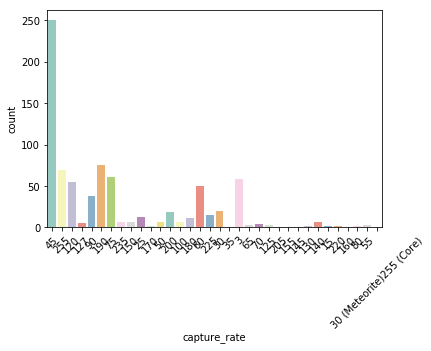

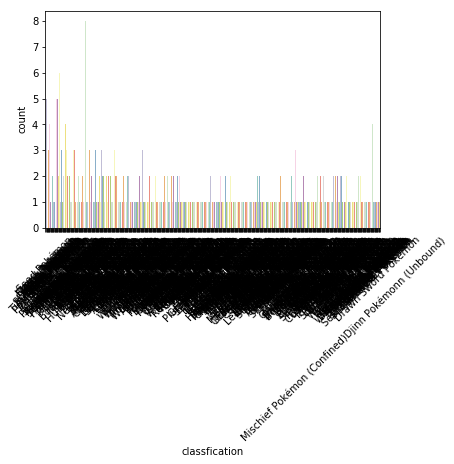

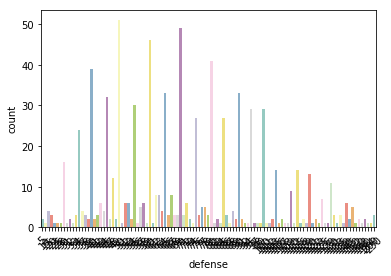

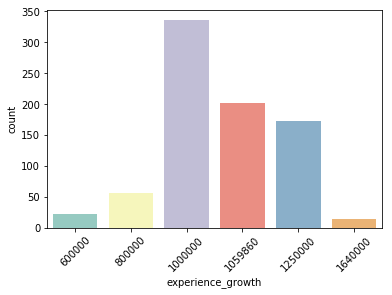

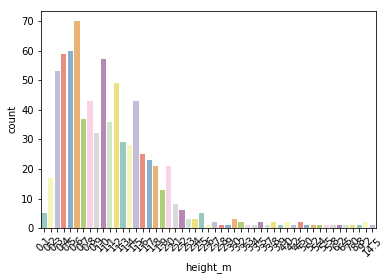

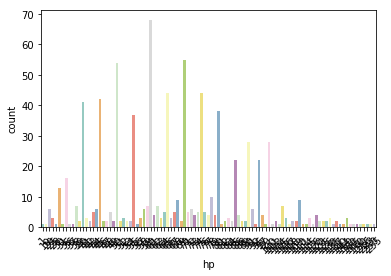

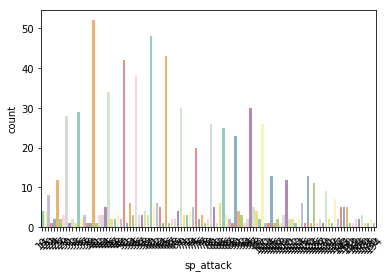

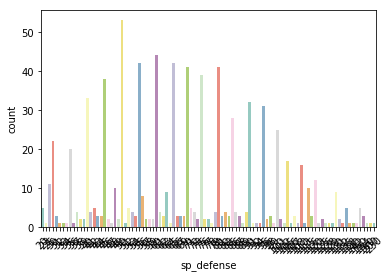

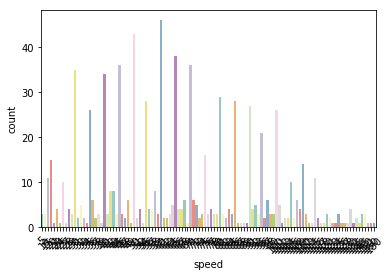

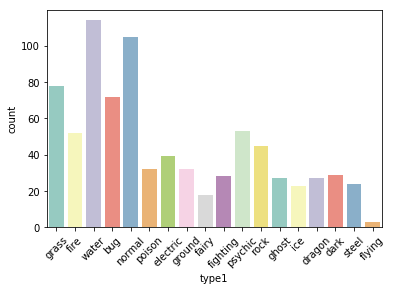

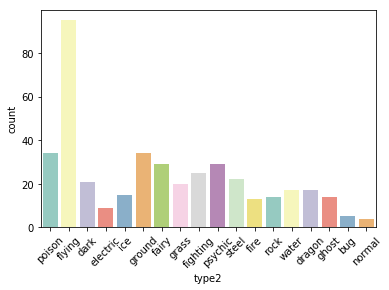

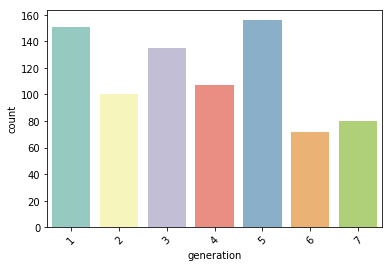

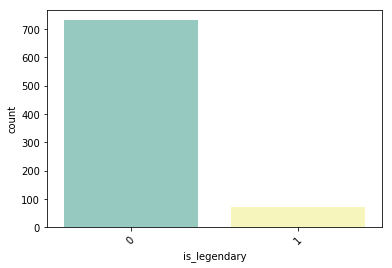

In [28]:
#Identifying any trends
pokemon_col = ['against_bug', 'against_dark', 'against_dragon','against_electric', 'against_fairy', 'against_fight', 'against_fire','against_flying', 'against_ghost', 'against_grass', 'against_ground','against_ice', 'against_normal', 'against_poison', 'against_psychic','against_rock', 'against_steel', 'against_water', 'attack','base_happiness', 'base_total', 'capture_rate','classfication', 'defense', 'experience_growth', 'height_m', 'hp','sp_attack', 'sp_defense', 'speed', 'type1', 'type2','generation', 'is_legendary']

for col in pokemon_col:
    sns.countplot(x = col, data = pokemon, palette = 'Set3')# hue = 'Good Loan')
    plt.xticks(rotation=45)
    plt.show()

<h1>Feature Engineering - Numeric Representation</h1>

In [29]:
#Creating numeric data from our existing data
pokemon_numeric = pokemon[pokemon_col]

pokemon_numeric = pd.get_dummies(pokemon_numeric, columns = pokemon_col)

pokemon_numeric.head()

against_bug_0.25  against_bug_0.5  against_bug_1.0  against_bug_2.0  \
0                 0                0                1                0   
1                 0                0                1                0   
2                 0                0                1                0   
3                 0                1                0                0   
4                 0                1                0                0   

   against_bug_4.0  against_dark_0.25  against_dark_0.5  against_dark_1.0  \
0                0                  0                 0                 1   
1                0                  0                 0                 1   
2                0                  0                 0                 1   
3                0                  0                 0                 1   
4                0                  0                 0                 1   

   against_dark_2.0  against_dark_4.0       ...        type2_water  \
0                 0                 0       ...                  0   
1                 0                 0       ...                  0   
2                 0                 0       ...                  0   
3                 0                 0       ...                  0   
4                 0                 0       ...                  0   

   generation_1  generation_2  generation_3  generation_4  generation_5  \
0             1             0             0             0             0   
1             1             0             0             0             0   
2             1             0             0             0             0   
3             1             0             0             0             0   
4             1             0             0             0             0   

   generation_6  generation_7  is_legendary_0  is_legendary_1  
0             0             0               1               0  
1             0             0               1               0  
2             0             0               1               0  
3             0             0               1               0  
4             0             0               1               0  

[5 rows x 1669 columns]

In [33]:
import os

In [34]:
from IPython.display import Image

In [35]:
PATH = "kmeansalg.png"

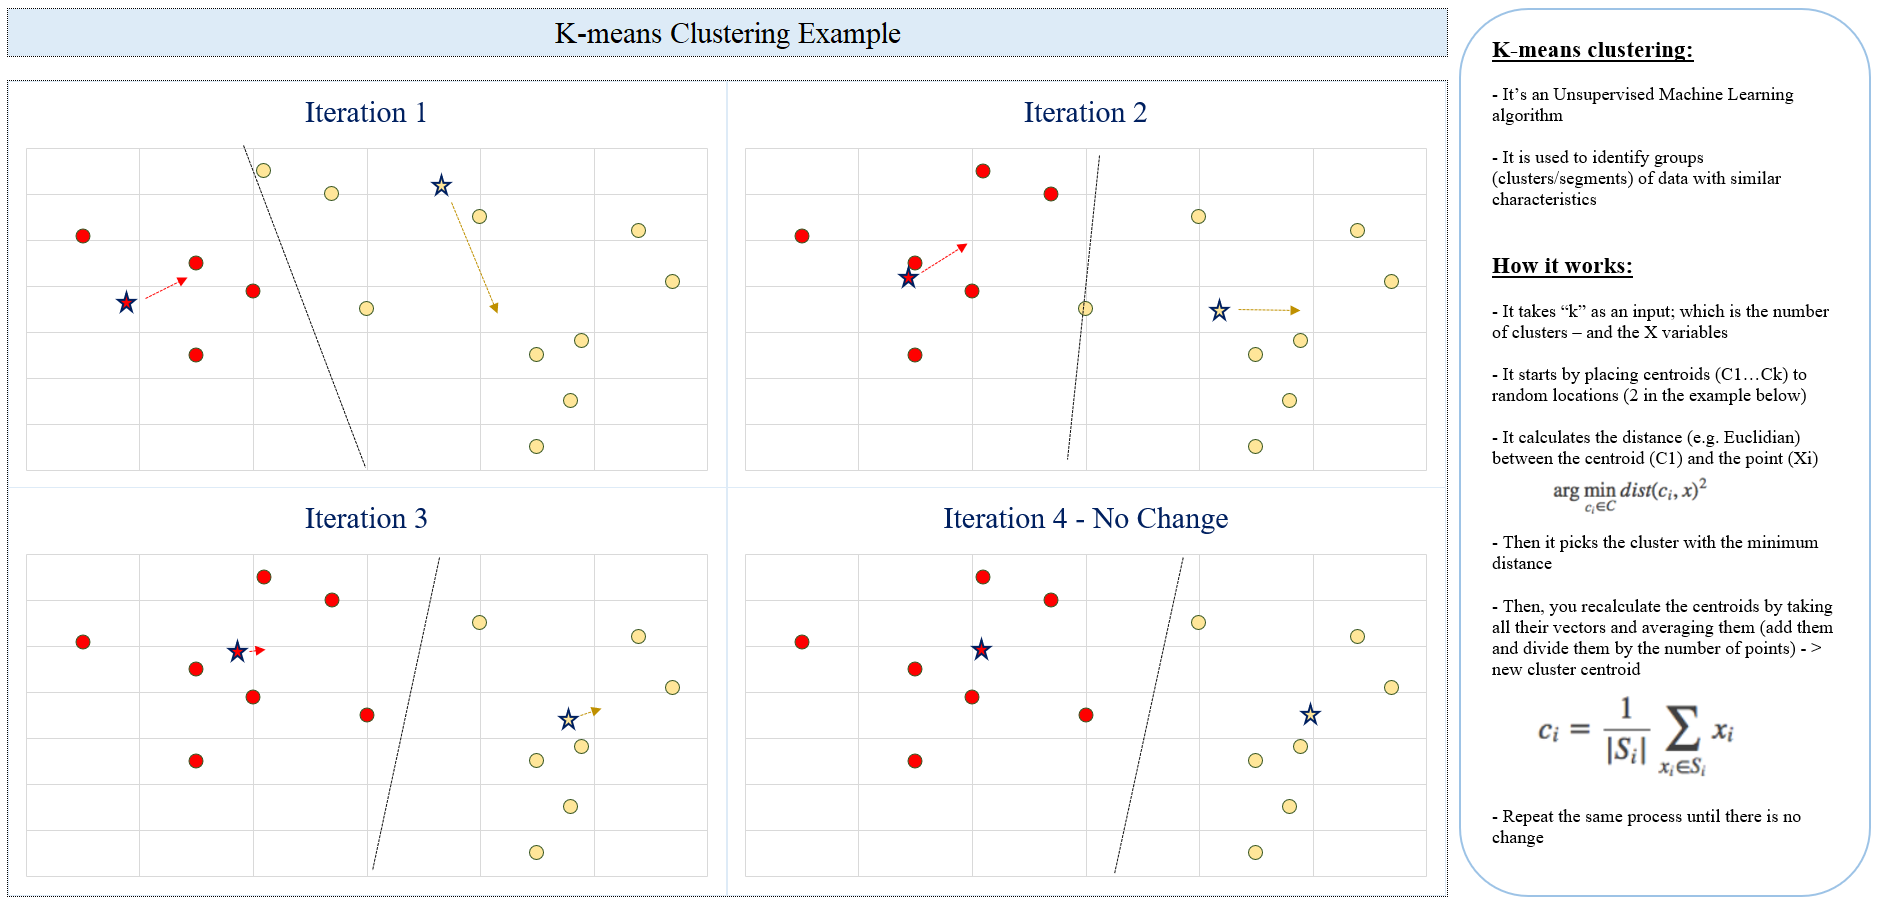

In [36]:
Image(filename = PATH, width = 1000, height = 1000)

<h1>K Means Clustering</h1>

In [30]:
#Running KMeans
X_train = pokemon_numeric.values

# We will start with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=540)
kmeans = kmeans.fit(X_train)

# Prints the clusters it assigned to each observation
print("The clusters are: ", kmeans.labels_)

# Prints the Inertia
print("The Inertia is: ", kmeans.inertia_)

The clusters are:  [2 2 2 3 3 0 4 4 4 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 4 4 1 1 3 1 1 3 1 1 3
 3 1 1 0 0 2 2 2 2 2 0 0 4 4 1 1 4 4 1 1 3 3 4 4 4 1 1 1 1 1 1 2 2 2 4 4 3
 3 3 3 3 4 4 3 3 0 0 0 4 4 1 1 4 4 1 1 1 3 1 1 4 4 1 1 2 2 4 4 1 1 1 1 1 3
 3 1 2 1 4 4 4 4 4 4 1 0 1 1 3 0 1 4 0 4 1 1 4 1 3 1 3 3 3 3 3 1 0 0 0 4 4
 0 1 1 2 2 2 3 3 3 4 4 4 1 1 0 0 0 0 0 0 0 4 4 1 1 1 1 0 0 0 1 1 1 2 4 4 3
 4 2 2 2 1 2 2 0 4 4 1 1 0 4 1 1 1 1 0 3 1 0 3 1 1 3 3 1 0 1 1 1 3 3 4 4 3
 4 4 0 0 3 3 3 4 4 4 1 1 1 1 1 1 1 3 1 1 1 3 4 3 3 3 0 0 2 2 2 2 3 3 3 4 4
 4 1 1 1 1 0 0 0 0 0 2 2 2 2 2 2 0 0 0 0 1 1 1 0 0 2 2 1 1 1 2 0 0 1 1 1 1
 1 1 3 1 1 1 3 3 3 3 1 1 1 1 1 1 0 0 2 1 1 4 4 4 4 3 3 3 1 1 1 4 4 4 2 2 0
 0 1 1 3 3 4 4 4 4 1 1 1 1 3 3 4 4 1 1 1 1 1 1 2 1 1 1 1 1 4 4 4 4 4 4 3 4
 4 4 0 3 3 3 3 1 3 4 4 4 4 0 3 1 2 2 2 3 3 3 4 4 3 0 0 0 1 4 0 0 1 1 1 2 2
 3 3 3 3 0 2 0 0 0 1 4 4 2 2 4 4 1 0 0 1 1 1 0 1 1 1 1 1 3 3 3 1 1 0 1 4 4
 4 1 1 3 4 4 0 1 1 1 2 4 4 0 2 2 1 3 1 3 2 1 3 0 0 2 1 0 4 1 1 3 1 1 1 1 1
 1 3 4

In [31]:
kmeans.labels_.shape

(801,)

<h2>What is Inertia</h2>
<p>Inertia is the within-cluster sum of squares criterion. It is a metric that shows how internally coherent the clusters are. Inertia assumes that clusters are convex and isotropic; performs poorly elongated clusters, or manifolds with irregular shapes; better use hierarchical clustering here. Inertia also performs poorly in very high-dimensional spaces since Euclidean distances become inflated and no normalisation is applied beforehand; not a normalised metric.</p>

In [32]:
# How to find the best number if Ks?

# Running K means with multible Ks

no_of_clusters = range(2,20) #[2,3,4,5,6,7,8,9]
inertia = []


for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(X_train)
    u = kmeans.inertia_
    inertia.append(u)
    print("The innertia for :", f, "Clusters is:", u)

The innertia for : 2 Clusters is: 17727.577426128686
The innertia for : 3 Clusters is: 17027.737068138606
The innertia for : 4 Clusters is: 16544.324111787097
The innertia for : 5 Clusters is: 16137.887432163221
The innertia for : 6 Clusters is: 15739.194034836228
The innertia for : 7 Clusters is: 15278.984314936344
The innertia for : 8 Clusters is: 15073.686036254809
The innertia for : 9 Clusters is: 14764.33401852465
The innertia for : 10 Clusters is: 14435.072090928064
The innertia for : 11 Clusters is: 14173.647735104494
The innertia for : 12 Clusters is: 14026.161219150808
The innertia for : 13 Clusters is: 13746.798383040601
The innertia for : 14 Clusters is: 13573.254331801489
The innertia for : 15 Clusters is: 13363.545924106089
The innertia for : 16 Clusters is: 13085.053799633873
The innertia for : 17 Clusters is: 12954.257947965023
The innertia for : 18 Clusters is: 13003.712503950126
The innertia for : 19 Clusters is: 12727.430137100062


Text(0.5, 1.0, 'Inertia Plot per k')

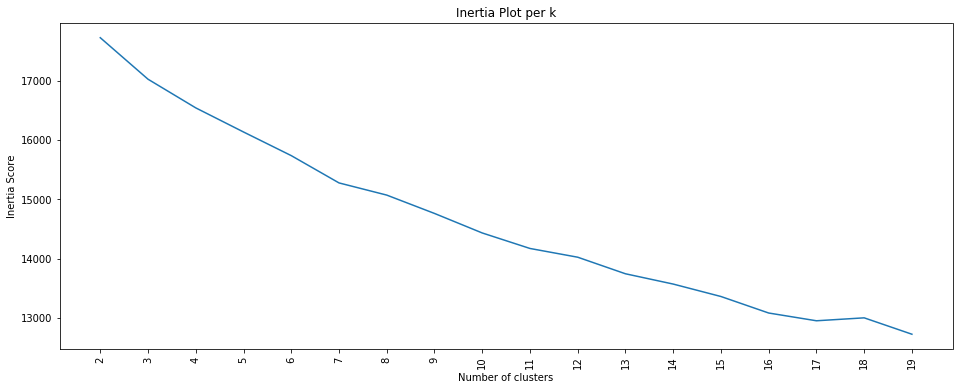

In [37]:
# Creating the scree plot for Intertia - elbow method
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

In [40]:

# Running K means on 7 clusters

kmeans = KMeans(n_clusters=7, random_state=2)
kmeans = kmeans.fit(X_train)


kmeans.labels_

# "predictions" for new data
predictions = kmeans.predict(X_train)

# calculating the Counts of the cluster
unique, counts = np.unique(predictions, return_counts=True)
counts = counts.reshape(1,7)

# Creating a datagrame
countscldf = pd.DataFrame(counts, columns = ["Cluster 0","Cluster 1","Cluster 2", "Cluster 3","Cluster 4","Cluster 5", "Cluster 6"])

# display
countscldf

Cluster 0  Cluster 1  Cluster 2  Cluster 3  Cluster 4  Cluster 5  Cluster 6
0        113        151         90        163        132         89         63

<h1>Running Principal Component Analysis (PCA) to Visualize & improve results</h1>
<h3>- What is it?</h3>
PCA is a dimensionality reduction technique that transforms a number of possibly correlated variables into a smaller number of uncorrelated variables; called principal components

The goal of PCA is to extract the most important information from the data table by compressing the size of the data set and keeping only the important information; then PCA computes new variables called principal components.
<h3>- Additional Info:</h3>
The first principal component is required to have the largest possible variance (inertia) and therefore this component will explain the largest part of the inertia / variance of the data table; hence the less principal components you have the lower the inertia will be after PCA.

For every new component you add, the inertia will increase since the rotations are always performed in a subspace and the new axes will always explain less inertia than the original components; which are computed to be optimal
Therefore, inertia should not be the criterium to choose the optimal number of principal component since the lower the components are the lower the inertia will be.
95% explained variance should be the criterium when choosing the number of principal components

Explained variance ratio (first two components): [0.06365529 0.04762155]


<Figure size 432x288 with 0 Axes>

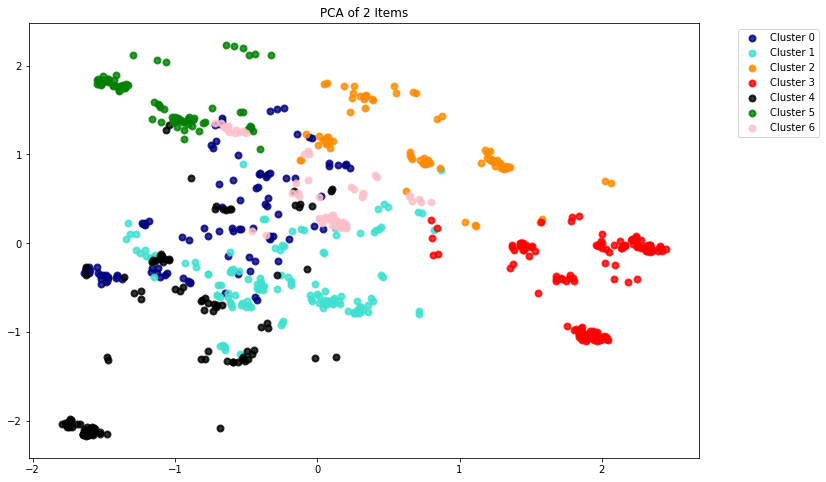

In [41]:
# Running PCA to Visualize the data

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = X_train
y_num = predictions

target_names = ["Cluster 0","Cluster 1","Cluster 2", "Cluster 3","Cluster 4","Cluster 5","Cluster 6"]

pca = PCA(n_components=2, random_state = 453)
X_r = pca.fit(X).transform(X)


# Percentage of variance explained for each components
print('Explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))

# Plotting the data
plt.figure()
plt.figure(figsize=(12,8))
colors = ['navy', 'turquoise', 'darkorange', 'red', 'black', 'green', 'pink']
lw = 2


for color, i, target_name in zip(colors, [0, 1, 2, 3, 4, 5, 6], target_names):
    plt.scatter(X_r[y_num == i, 0], X_r[y_num == i, 1], color=color, alpha=.8, lw=lw,label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)   
plt.title('PCA of 2 Items')
plt.show()